# IO

In [1]:
%matplotlib notebook
from numpy import *

import pickle
import sys
sys.path.append( './malt' )
from malt.algorithm.topology import Fragmentation
# from malt.plot.graph import GraphPlots
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import Image

frag = Fragmentation()
compact = frag.weights_compact
longrange = frag.weights_longrange

tmpdir = '/home/bkrull/Desktop/tmpdir/'

In [2]:
class GraphPlots(animation.FuncAnimation):
    def __init__(self, atoms, list_of_coords):
        self.atoms = atoms
        self.list_of_coords = list_of_coords
        self.fig, (self.ax1, self.ax2) = plt.subplots(1, 2)

        self.ax1.set_title('Adjacency Matrix')
        self.ax1.set_xticks(np.arange(len(atoms)))
        self.ax1.set_yticks(np.arange(len(atoms)))
        self.ax1.set_xticklabels(atoms)
        self.ax1.set_yticklabels(atoms)

        self.ax2.set_title('Laplacian Matrix')
        self.ax2.set_xticks(np.arange(len(atoms)))
        self.ax2.set_yticks(np.arange(len(atoms)))
        self.ax2.set_xticklabels(atoms)
        self.ax2.set_yticklabels(atoms)

        c = np.asarray(self.list_of_coords[0])
        adj = frag.get_adjacency(c, atoms, compact)
        lap = frag.get_laplacian(c, self.atoms, compact)

        self.im1 = self.ax1.imshow(adj, cmap=plt.cm.gray)
        self.im2 = self.ax2.imshow(lap, cmap=plt.cm.gray)
        
        animation.FuncAnimation.__init__(self, self.fig, self._update, 
                                         frames=len(self.list_of_coords),
                                         interval=40, repeat_delay=0);
        
#         self.fig.colorbar(self.im2, ticks=np.linspace(np.amin(lap), np.amax(lap), 5), ax=self.ax2)
        self.fig.show()
                
    def _update(self, frame, *fargs):
        c = np.asarray(self.list_of_coords[frame])
        adj = frag.get_adjacency(c, self.atoms, compact)
        lap = frag.get_laplacian(c, self.atoms, compact)

        self.im1.set_array(adj)
        self.im2.set_array(lap)

        return [self.im1, self.im2]

# Simple Example

In [3]:
water_symbols = [ 'O', 'H', 'H' ]
water_xyz_intact = array( [ [ -1.89071, -0.25814,  0.10872 ],
                            [ -2.18007,  0.46912,  0.71533 ],
                            [ -0.90138, -0.22523,  0.13618 ] ] )
water_xyz_broken = array( [ [ -1.89071, -0.25814,  0.10872 ],
                            [ -2.18007,  0.46912,  0.71533 ],
                            [  0.12249, -0.08978,  0.07429 ] ] )

print( 'Number of fragments before:', frag.get_number_of_fragments( water_xyz_intact, water_symbols ) )
print( 'Number of fragments after :', frag.get_number_of_fragments( water_xyz_broken, water_symbols ) )
b = frag.find_broken_bond( water_xyz_intact, water_xyz_broken, water_symbols )
print( 'The broken bond is between:', b, water_symbols[b[0]], water_symbols[b[1]] )

ether_symbols = [ 'C', 'O', 'C', 'C', 'N', 'C', 'O', 'C', 'C', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H' ]
ether_xyz_intact = array( [ [-0.327416,  1.336690, -0.088826],
                            [ 0.122257,  0.006020, -0.017027],
                            [ 0.780770, -0.494286, -1.164555],
                            [ 1.341085, -1.915222, -0.923429],
                            [ 0.459332, -2.780424, -1.701691],
                            [ 0.525173, -4.155488, -1.732579],
                            [-0.184837, -4.886886, -2.409895],
                            [-0.359337, -2.031089, -2.506565],
                            [-0.206559, -0.724103, -2.275109],
                            [ 0.493974,  1.992902, -0.394846],
                            [-1.121766,  1.435638, -0.832994],
                            [-0.674073,  1.656186,  0.896923],
                            [ 1.574333,  0.194635, -1.474166],
                            [ 2.355830, -2.023499, -1.324117],
                            [ 1.341442, -2.235434,  0.124245],
                            [ 1.295273, -4.556482, -1.053162],
                            [-1.013705, -2.506801, -3.231184],
                            [-0.732005,  0.045806, -2.825277],
                            [ 0.658562, -0.131861,  0.804267] ] )
ether_xyz_broken = array( [ [-0.524245,  1.424635,  0.591764],
                            [ 0.190000,  0.284826,  0.981061],
                            [ 1.107076, -0.600138, -2.175731],
                            [ 1.350642, -1.795145, -1.314970],
                            [ 0.441878, -2.824707, -1.926330],
                            [ 0.351717, -4.218926, -1.392620],
                            [-0.363033, -4.961388, -1.992102],
                            [-0.227092, -2.278384, -2.965217],
                            [ 0.179742, -0.907323, -3.130348],
                            [-0.098930,  2.343718,  1.011183],
                            [-0.433378,  1.441556, -0.498958],
                            [-1.582161,  1.347319,  0.868932],
                            [ 1.611429,  0.357352, -2.011294],
                            [ 2.411530, -2.126562, -1.325097],
                            [ 1.077126, -1.603811, -0.250745],
                            [ 0.955962, -4.425453, -0.492598],
                            [-0.967027, -2.813743, -3.579330],
                            [-0.212034, -0.245715, -3.909398],
                            [ 0.249302,  0.299962,  1.928197] ] )

print( 'Number of fragments before:', frag.get_number_of_fragments( ether_xyz_intact, ether_symbols ) )
print( 'Number of fragments after :', frag.get_number_of_fragments( ether_xyz_broken, ether_symbols ) )
b = frag.find_broken_bond( ether_xyz_intact, ether_xyz_broken, ether_symbols )
print( 'The broken bond is between:', b, ether_symbols[b[0]], ether_symbols[b[1]] )

Number of fragments before: 1
Number of fragments after : 2
The broken bond is between: (0, 2) O H
Number of fragments before: 1
Number of fragments after : 2
The broken bond is between: (1, 2) O C


# "Real" Example

In [6]:
with open(tmpdir+'parent.pickle', 'rb') as handle:
    parent = pickle.load(handle)

with open(tmpdir+'children.pickle', 'rb') as handle:
    children = pickle.load(handle)
    
child0 = children[0]
atoms = [a[0] for a in child0['atom_list']]
coords = child0['coords']

# print(len(coords))
# g = GraphPlots(atoms, coords)

child1 = children[1]
atoms = [a[0] for a in child1['atom_list']]
coords = child1['coords']

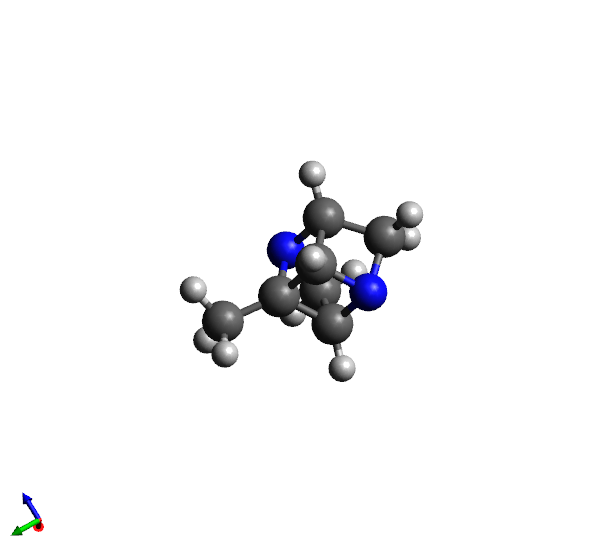

In [7]:
with open(tmpdir+"mol-5532-parent.png",'rb') as f:
    display(Image(data=f.read(), format='png'))

<IPython.core.display.Javascript object>


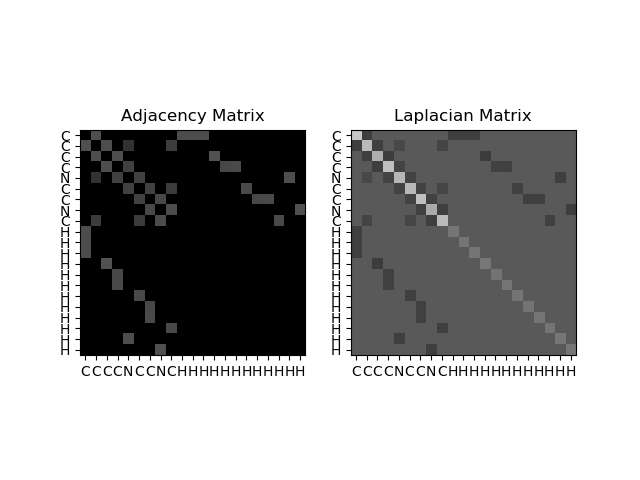

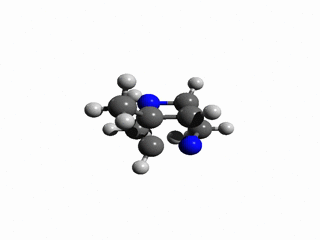

In [8]:
g = GraphPlots(atoms, coords)
with open(tmpdir+"mol-5532-child1.gif",'rb') as f:
    display(Image(data=f.read(), format='png', width=500, height=500))

In [ ]:
step0 = 0
for step in range(1, len(coords)):
    start = np.asarray(coords[step0])
    end = np.asarray(coords[step])
    b = frag.find_broken_bond(start, end, atoms)
    print('The broken bond is between:', b, atoms[b[0]], atoms[b[1]])
    step0 = step